<a href="https://www.kaggle.com/code/masoudnaghshbandi/product-failure-t-p-series-aug-2022?scriptVersionId=108065866" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import libraries

In [206]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import imblearn
from imblearn.over_sampling import SMOTE

The data set is about factory which produce product A. We have to predict defect products.

## load data

In [207]:
df_train=pd.read_csv('../input/tabular/train.csv')
df_train.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


# set id column as index column

In [208]:
df_train.set_index('id')

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,E,158.95,material_7,material_6,6,9,6,16,4,16.301,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,E,146.02,material_7,material_6,6,9,10,12,8,17.543,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,E,115.62,material_7,material_6,6,9,1,10,1,15.670,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0


# handle missing value¶


In [209]:
df_train_miss=['loading','attribute_2','attribute_3','measurement_0','measurement_1','measurement_2','measurement_3','measurement_4','measurement_5','measurement_6','measurement_7','measurement_8','measurement_9','measurement_10','measurement_11','measurement_12','measurement_13','measurement_14','measurement_15','measurement_16','measurement_17']

df_train_miss=pd.DataFrame(df_train_miss)

In [210]:
df_train_miss.isnull().sum().sum()

0

# Preprocessing

In [211]:
from sklearn.preprocessing import LabelEncoder


In [212]:
cols = ["product_code", "attribute_0", "attribute_1"]


# Encode categorical column to numeric

In [213]:
df_train[cols] = df_train[cols].apply(LabelEncoder().fit_transform)

In [214]:
df_train=df_train.fillna(df_train.median())

In [215]:
df_train.isnull().sum().sum()

0

In [216]:
df_train.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,0,80.10,1,2,9,5,7,8,4,...,10.672,15.859,17.5940,15.193,15.029,16.040,13.034,14.684,764.100,0
1,1,0,84.89,1,2,9,5,14,3,3,...,12.448,17.947,17.9150,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,0,82.43,1,2,9,5,12,1,5,...,12.715,15.607,19.2115,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,0,101.07,1,2,9,5,13,2,6,...,12.471,16.346,18.3770,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,0,188.06,1,2,9,5,9,2,8,...,10.337,17.082,19.9320,12.428,16.182,12.760,13.153,16.412,579.885,0


# Find correlation

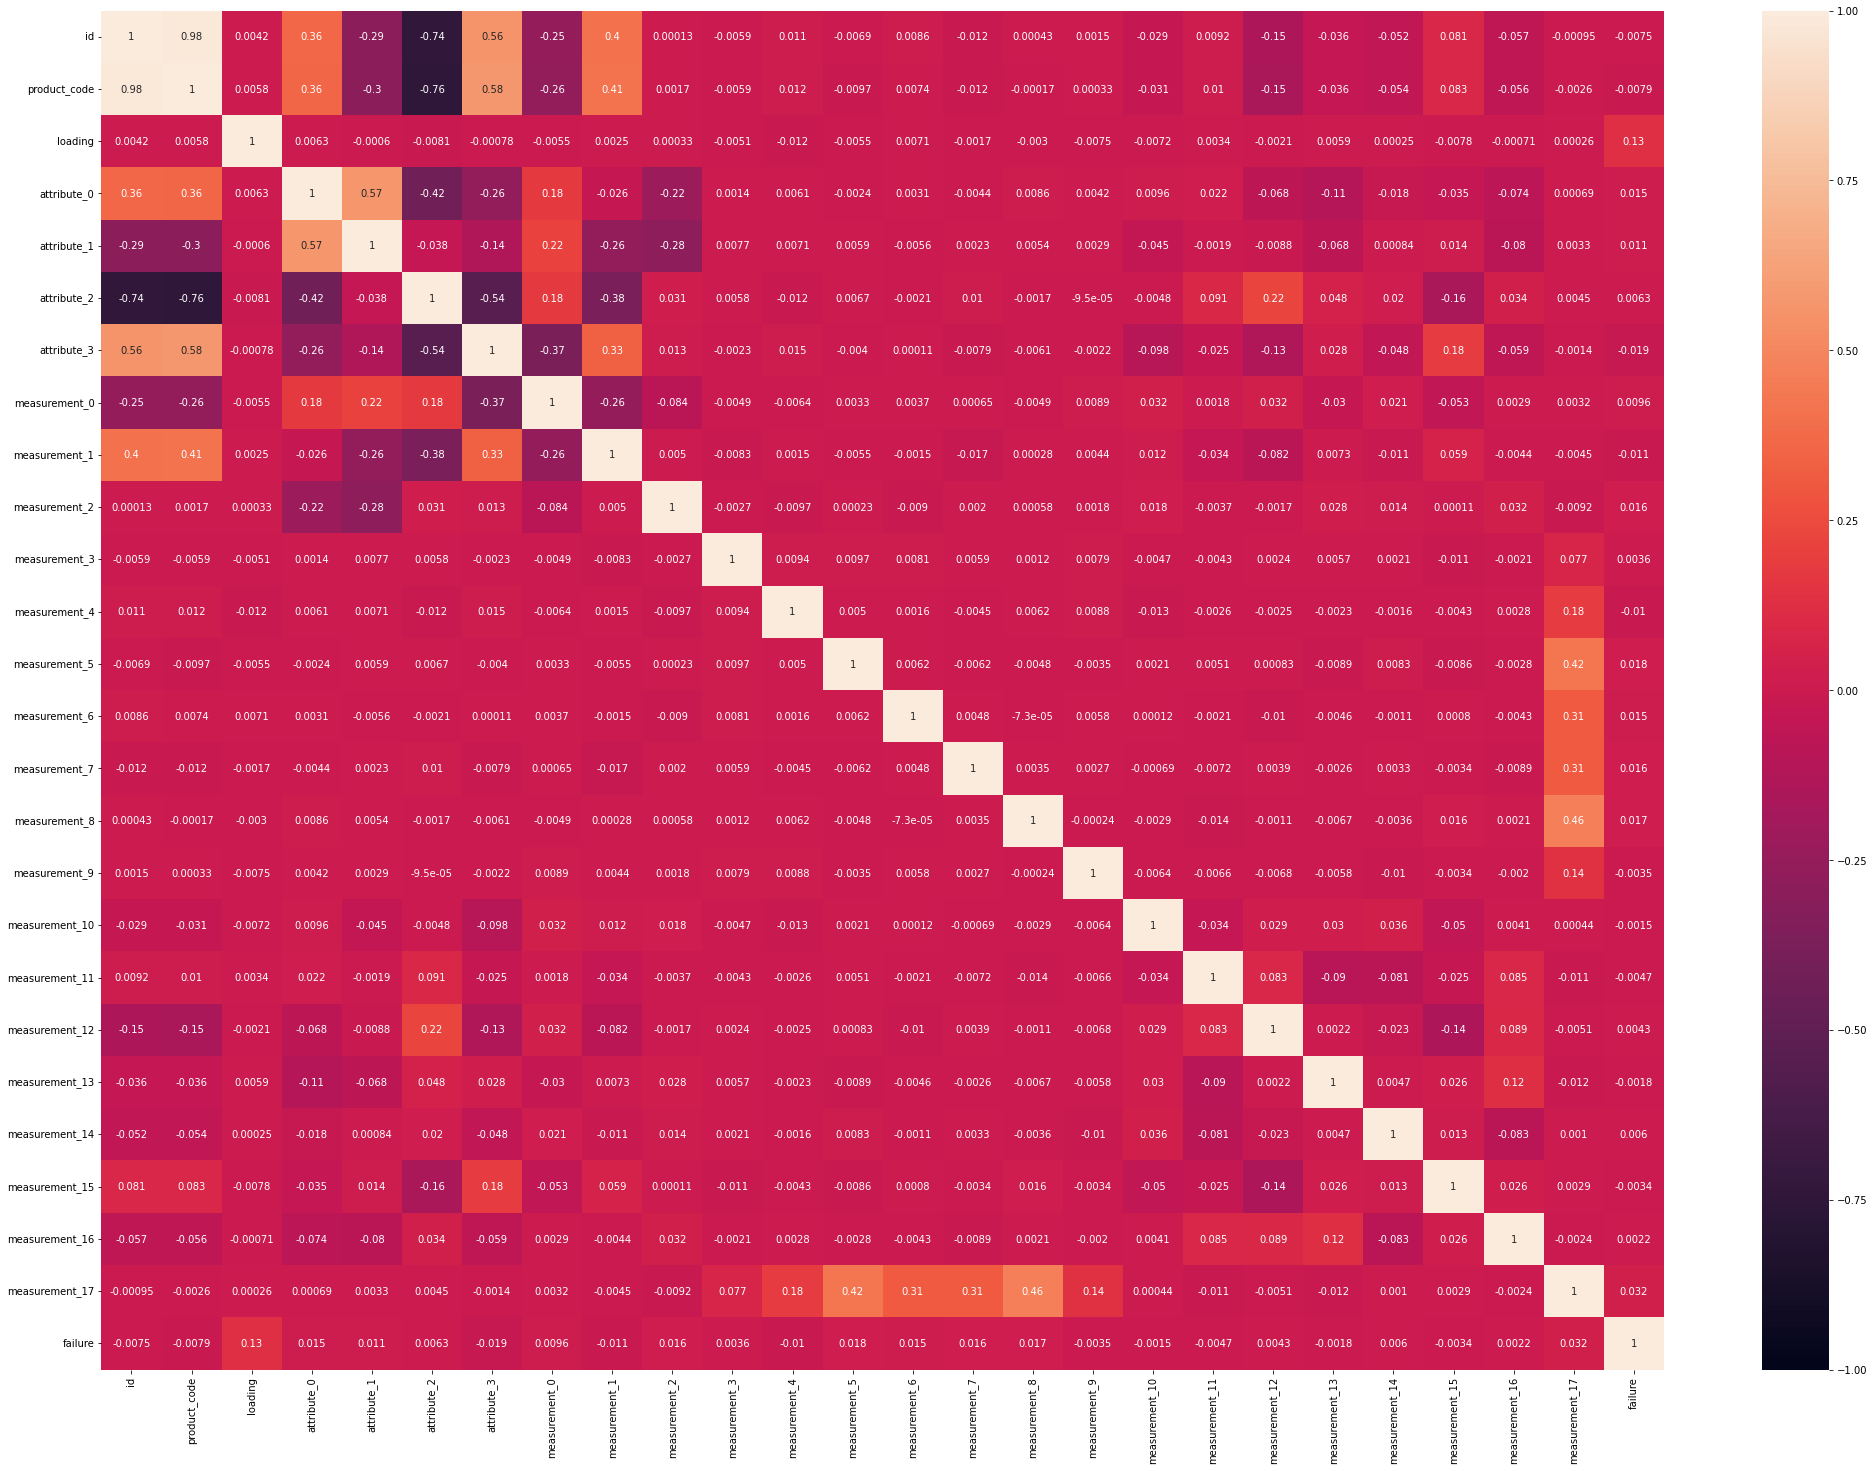

In [217]:
plt.figure(figsize=(35, 25))
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True)

In [218]:
df_train.set_index('id')

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,
0,0,80.10,1,2,9,5,7,8,4,18.040,...,10.672,15.859,17.5940,15.193,15.029,16.040,13.034,14.684,764.100,0
1,0,84.89,1,2,9,5,14,3,3,18.213,...,12.448,17.947,17.9150,11.755,14.732,15.425,14.395,15.631,682.057,0
2,0,82.43,1,2,9,5,12,1,5,18.057,...,12.715,15.607,19.2115,13.798,16.711,18.631,14.094,17.946,663.376,0
3,0,101.07,1,2,9,5,13,2,6,17.295,...,12.471,16.346,18.3770,10.020,15.250,15.562,16.154,17.172,826.282,0
4,0,188.06,1,2,9,5,9,2,8,19.346,...,10.337,17.082,19.9320,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,4,158.95,1,1,6,9,6,16,4,16.301,...,11.430,12.177,17.9420,10.112,15.795,18.572,16.144,16.436,729.131,0
26566,4,146.02,1,1,6,9,10,12,8,17.543,...,11.242,14.179,20.5640,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,4,115.62,1,1,6,9,1,10,1,15.670,...,11.407,16.437,17.4760,8.668,15.069,16.599,15.590,14.065,750.364,0


In [219]:
df_train.shape

(26570, 26)

# Make supervised data format

In [220]:
X=df_train.iloc[:, 0:14]


In [221]:
X.set_index('id')

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6
id,,,,,,,,,,,,,
0,0,80.10,1,2,9,5,7,8,4,18.040,12.518,15.748,19.292
1,0,84.89,1,2,9,5,14,3,3,18.213,11.540,17.717,17.893
2,0,82.43,1,2,9,5,12,1,5,18.057,11.652,16.738,18.240
3,0,101.07,1,2,9,5,13,2,6,17.295,11.188,18.576,18.339
4,0,188.06,1,2,9,5,9,2,8,19.346,12.950,16.990,15.746
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,4,158.95,1,1,6,9,6,16,4,16.301,13.259,18.068,15.505
26566,4,146.02,1,1,6,9,10,12,8,17.543,11.733,17.984,19.078
26567,4,115.62,1,1,6,9,1,10,1,15.670,11.535,16.778,18.385


In [222]:
X=X.values

In [223]:
y=df_train['failure']


In [226]:
#scaler=StandardScaler()


In [227]:
#X = scaler.fit_transform(X.astype(float))


# Train test split

In [228]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)


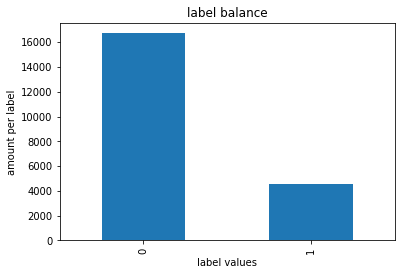

In [229]:
y_train.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

# Make Balanced

In [233]:
oversample = SMOTE()


In [234]:
X, y = oversample.fit_resample(X, y)


In [235]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)


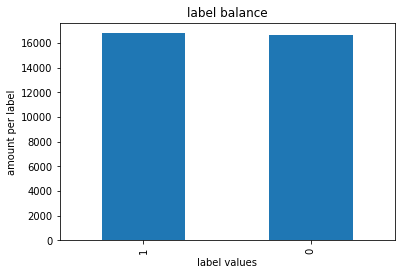

In [236]:
y_train.value_counts().plot(kind='bar')
plt.title('label balance')
plt.xlabel('label values')
plt.ylabel('amount per label')
plt.show()

In [237]:
#from sklearn.decomposition import PCA

In [238]:
#pca = PCA()

In [239]:
#comp = pca.fit(df_train)

In [240]:
#plt.plot(np.cumsum(comp.explained_variance_ratio_))
#plt.grid()
#plt.xlabel('Number of Principal Components')
#plt.ylabel('Explained Variance')
#sns.despine()

In [241]:
#df_train_transform = pca.transform(df_train)

In [242]:
#model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [243]:
#model.fit(X_train, y_train)

# Training model

In [244]:
from sklearn.ensemble import RandomForestClassifier

In [245]:
rfc = RandomForestClassifier()


In [246]:
#from sklearn.model_selection import train_test_split, GridSearchCV


In [247]:
#grid_space={'max_depth':[3,5,10,None],
           #  'n_estimators':[10,100,200],
           #  'max_features':[1,3,5,9],
            # 'min_samples_leaf':[1,2,3],
             # 'min_samples_split':[1,2,3]
        #  }

In [248]:
rfc = RandomForestClassifier(max_depth=None, max_features=9,min_samples_leaf=1, min_samples_split=2,n_estimators= 200 )

In [249]:
model=rfc.fit(X_train,y_train)


In [250]:
#model = rfc.fit(X_train,y_train)



In [251]:
#print('Best hyperparameters are: '+str(model_grid.best_params_))
#print('Best score is: '+str(model_grid.best_score_))

In [252]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [253]:
from sklearn import metrics

In [254]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      4241
           1       0.97      0.74      0.84      4128

    accuracy                           0.86      8369
   macro avg       0.88      0.86      0.86      8369
weighted avg       0.88      0.86      0.86      8369

[[4150   91]
 [1080 3048]]


In [255]:
accuracy = accuracy_score(expected_y, predicted_y)
accuracy

0.8600788624686343

# Test Model output

In [256]:
df_test=pd.read_csv("../input/tabular/test.csv")
df_test.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [257]:
df_test.set_index('id')


,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
id,,,,,,,,,,,,,,,,,,,,,
26570,F,119.57,material_5,material_6,6,4,6,9,6,19.305,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
26571,F,113.51,material_5,material_6,6,4,11,8,0,17.883,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
26572,F,112.16,material_5,material_6,6,4,8,12,4,18.475,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
26573,F,112.72,material_5,material_6,6,4,8,11,10,16.518,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
26574,F,208.00,material_5,material_6,6,4,14,16,8,17.808,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47340,I,144.74,material_7,material_5,9,5,0,4,9,18.465,...,18.573,11.691,NaN,19.771,11.562,17.246,15.131,15.209,NaN,696.466
47341,I,74.53,material_7,material_5,9,5,4,8,7,18.900,...,17.917,10.980,16.027,15.694,13.564,15.494,15.296,13.812,16.501,613.249
47342,I,67.73,material_7,material_5,9,5,10,11,2,18.656,...,19.630,10.436,16.137,20.612,11.134,16.519,15.525,14.175,17.728,783.349


In [258]:
cols = ["product_code", "attribute_0", "attribute_1"]

In [259]:
df_test.isnull().sum()


id                   0
product_code         0
loading            223
attribute_0          0
attribute_1          0
attribute_2          0
attribute_3          0
measurement_0        0
measurement_1        0
measurement_2        0
measurement_3      329
measurement_4      409
measurement_5      508
measurement_6      624
measurement_7      720
measurement_8      846
measurement_9      904
measurement_10    1067
measurement_11    1136
measurement_12    1240
measurement_13    1303
measurement_14    1440
measurement_15    1542
measurement_16    1678
measurement_17    1740
dtype: int64

In [260]:
df_test=df_test.fillna(df_train.median())

In [261]:
df_test.isnull().sum()


id                0
product_code      0
loading           0
attribute_0       0
attribute_1       0
attribute_2       0
attribute_3       0
measurement_0     0
measurement_1     0
measurement_2     0
measurement_3     0
measurement_4     0
measurement_5     0
measurement_6     0
measurement_7     0
measurement_8     0
measurement_9     0
measurement_10    0
measurement_11    0
measurement_12    0
measurement_13    0
measurement_14    0
measurement_15    0
measurement_16    0
measurement_17    0
dtype: int64

In [262]:
df_test[cols] = df_test[cols].apply(LabelEncoder().fit_transform)

In [263]:
df_test.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,0,119.57,0,1,6,4,6,9,6,...,18.654,10.802,15.909,18.0700,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,0,113.51,0,1,6,4,11,8,0,...,19.368,12.032,13.998,19.2115,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,0,112.16,0,1,6,4,8,12,4,...,17.774,11.743,17.046,18.0860,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,0,112.72,0,1,6,4,8,11,10,...,18.948,11.790,18.165,16.1630,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,0,208.00,0,1,6,4,14,16,8,...,19.141,12.370,14.578,17.8490,11.941,16.070,16.183,13.324,17.150,801.044


In [264]:
df_test=df_test.iloc[:, 0:14]


In [265]:
df_test.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6
0,26570,0,119.57,0,1,6,4,6,9,6,19.305,10.178,17.534,18.168
1,26571,0,113.51,0,1,6,4,11,8,0,17.883,11.927,17.228,16.033
2,26572,0,112.16,0,1,6,4,8,12,4,18.475,10.481,16.619,18.189
3,26573,0,112.72,0,1,6,4,8,11,10,16.518,10.888,15.293,18.592
4,26574,0,208.00,0,1,6,4,14,16,8,17.808,12.693,17.678,15.814


In [266]:
y_pred_test = model.predict(df_test)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [267]:
df_test['failure'] = y_pred_test

In [268]:
df_test_new = df_test[['id', 'failure']]

In [269]:
df_test_new.head(5)

,id,failure
0,26570,0
1,26571,0
2,26572,0
3,26573,0
4,26574,0


In [270]:
df_test_new.set_index('id')

,failure
id,
26570,0
26571,0
26572,0
26573,0
26574,0
...,...
47340,0
47341,0
47342,0


In [271]:
sample_solution=df_test_new.to_csv("sample_solution2.csv")